# <b> Lab 3 : Mutual information and NMI calculation </b>

<i> Compte-rendu par Valentin SÉRÉE et Jérémy SERENA [INFO3]</i>

<b> <u> Question 1 </u> </b>

Nous allons calculer l'information mutuelle entre deux vecteurs X et Y. Pour cela, nous allons estimer la fonction de densité de probabilité conjointe (<i>joint pdf</i>) en construisant au préalable la matrice de contingence.

<hr>
<div style = "font-family: Courier">
    <p style = "font:font-weight: bold; color: #ffecc5">
        matriceContingence
    </p>
    <div style = "padding-left: 15px; color: #b6cff5">
        <b>@in :</b> X = premier vecteur d'informations 
        </br>
        <b>@in :</b> Y = deuxième vecteur d'informations
        </br>
        <b>@in :</b> alphabet = alphabet des symboles du vecteur
        </br>
        <b>@out :</b> matrice = matrice de contingence construite
    </div>
</div>
<hr><br>
<div>
Cette fonction construit la matrice de contingence à partir de deux vecteurs donnés en entrée.</div>



In [1]:
import math as m
import numpy as np

def matriceContingence(X, Y, alphabet):
    taille = len(alphabet)
    tab = np.zeros(shape = (taille,taille)) # on construit une matrice qui compte l'apparition de chaque symbole
    matr = np.zeros(shape =(taille,taille)) # on construit une matrice qui recense les probabilités
    for k in range (len(X)):
        x = coordonnees(X[k], alphabetVect) # on récupère toutes les coordonnées de chaque élément dans la matrice
        y = coordonnees(Y[k], alphabetVect)
        tab[x][y] += 1
    total = np.sum(tab) # on somme tous les éléments
    matr = (1/total) * tab # on calcule les probabilités
    return matr

<hr>
<div style = "font-family: Courier">
    <p style = "font:font-weight: bold; color: #ffecc5">
        coordonnees
    </p>
    <div style = "padding-left: 15px; color: #b6cff5">
        <b>@in :</b> lettre = lettre dont on cherche la position
        </br>
        <b>@in :</b> alphabet = alphabet
        </br>
        <b>@out :</b> position : position de la lettre dans la matrice de contingence
    </div>
</div>
<hr><br>
<div>
Cette fonction auxiliaire renvoie la ligne/colonne (selon le contexte d'appel) à laquelle se situe la lettre fournie en paramètre dans la matrice de contingence.</div>



In [2]:
def coordonnees(lettre, alphabet):
    position = alphabet[lettre]
    return position

<hr>
<div style = "font-family: Courier">
    <p style = "font:font-weight: bold; color: #ffecc5">
        pX
    </p>
    <div style = "padding-left: 15px; color: #b6cff5">
        <b>@in :</b> matr = matrice de contingence
        </br>
        <b>@out :</b> pX : vecteur recensant toutes les probabilités p<sub>X</sub> d'apparition de chaque lettre
    </div>
</div>
<hr><br>
<div>
Cette fonction construit le vecteur des probabilités p<sub>X</sub> grâce à la matrice de contingence (somme par ligne des probabilités).</div>



In [3]:
def pX(matr): 
    (l, L) = matr.shape
    pX = np.zeros(shape=(l,1))
    for i in range (l):
        s = 0
        for j in range (L):
            s+= matr[i][j]
        pX[i][0] = s
    return pX

<hr>
<div style = "font-family: Courier">
    <p style = "font:font-weight: bold; color: #ffecc5">
        pY
    </p>
    <div style = "padding-left: 15px; color: #b6cff5">
        <b>@in :</b> matr = matrice de contingence
        </br>
        <b>@out :</b> pY : vecteur recensant toutes les probabilités p<sub>Y</sub> d'apparition de chaque lettre
    </div>
</div>
<hr><br>
<div>
Cette fonction construit le vecteur des probabilités p<sub>Y</sub> grâce à la matrice de contingence (somme par colonne des probabilités).</div>

In [4]:
def pY(matr):
    (l, L) = matr.shape
    pY = np.zeros(shape=(1,L))
    for j in range(L):
        s = 0
        for i in range (l):
            s+=matr[i][j]
        pY[0][j] = s
    return pY

<hr>
<div style = "font-family: Courier">
    <p style = "font:font-weight: bold; color: #ffecc5">
        infoMutuelle
    </p>
    <div style = "padding-left: 15px; color: #b6cff5">
        <b>@in :</b> X = premier vecteur d'informations
        </br>
        <b>@in :</b> Y = deuxième vecteur d'informations
        </br>
        <b>@out :</b> info : information mutuelle entre les deux vecteurs
    </div>
</div>
<hr><br>
<div>
Cette fonction construit la matrice de contingence grâce aux deux vecteurs afin de calculer l'information mutuelle entre ces deux vecteurs.</div>

In [5]:
def infoMutuelle(X, Y):
    global alphabetVect
    mat = matriceContingence(X, Y, alphabetVect) # on construit la matrice de contingence
    mat[mat==0]=10**-50 # pour éviter de diviser par 0 
    py = pY(mat) # on récupère pY
    px = pX(mat) # on récupère pX
    den = (px*py)**-1 # on calcule 1/(pX * pY)
    mult = mat*den # on calcule matContingence/(pX * pY)
    res = mat*(np.log2(mult)) # on calcule le log2 de ce rapport que l'on multiplie à la matrice de contingence
    info = np.sum(res) # on somme tout
    return info 

<b> <u> Question 2 </u> </b>

Nous cherchons désormais à calculer l'information mutuelle normalisée (NMI). Pour cela, nous aurons besoin de l'information mutuelle (déjà construite en question 1) ainsi que de l'entropie d'un vecteur.

En amont du calcul de l'entropie, il est nécessaire de calculer les probabilités réelles d'apparition de chaque symbole dans chaque vecteur.

<hr>
<div style = "font-family: Courier">
    <p style = "font:font-weight: bold; color: #ffecc5">
        calculProba
    </p>
    <div style = "padding-left: 15px; color: #b6cff5">
        <b>@in :</b> vect = vecteur d'informations
        </br>
        <b>@out :</b> proba : probabilités d'apparition réelles de chaque symbole dans vect
    </div>
</div>
<hr><br>
<div>
Cette fonction calcule les probabilités d'apparition réelle de chaque symbole dans le vecteur.</div>

In [6]:
def calculProba(vect):
    proba = {}
    for k in range (len(vect)): # on parcourt le vecteur et on compte le nombre d'apparition
        symb = vect[k]
        if (symb in proba):
            proba[symb] += 1
        else:
            proba[symb] = 1
    for cle, valeur in proba.items(): # on divise par le nombre de termes
        proba[cle]=valeur/len(vect)
    return proba

<hr>
<div style = "font-family: Courier">
    <p style = "font:font-weight: bold; color: #ffecc5">
        entropie
    </p>
    <div style = "padding-left: 15px; color: #b6cff5">
        <b>@in :</b> vect = vecteur d'informations
        </br>
        <b>@out :</b> H : entropie réelle
    </div>
</div>
<hr><br>
<div>
Cette fonction calcule l'entropie d'un vecteur.</div>

In [7]:
def entropie(vect): 
    H = 0
    p = calculProba(vect)
    for cle, valeur in p.items():
        if valeur!=0:
            H += - valeur * m.log2(valeur)
    return H

<hr>
<div style = "font-family: Courier">
    <p style = "font:font-weight: bold; color: #ffecc5">
        NMI
    </p>
    <div style = "padding-left: 15px; color: #b6cff5">
        <b>@in :</b> X = vecteur d'informations
        </br>
        <b>@in :</b> Y = vecteur d'informations
        </br>
        <b>@out :</b> NMI  : information mutuelle normalisée
    </div>
</div>
<hr><br>
<div>
Cette fonction calcule l'information mutuelle normalisée entre deux vecteurs.</div>

In [8]:
def NMI(X,Y):
    I = infoMutuelle(X,Y)
    Hx = entropie(X)
    Hy = entropie(Y)
    NMI = (2*I)/(Hx+Hy)
    return NMI

<h4> Test des fonctions formées </h4>
On peut tester nos fonctions avec deux vecteurs très simples.

In [9]:
# On définit l'alphabet
alphabetVect = {"A": 0, "T": 1, "C": 2, "G": 3, "-": 4}

# On définit deux vecteurs simples
X, Y = ['T', 'T', 'A'], ['G', 'T', 'C']

print("L'information mutuelle est de " + str(infoMutuelle(X,Y))[:6] + " bit/symbole")
print("L'information mutuelle normalisée est de " + str(NMI(X,Y))[:6])


L'information mutuelle est de 0.9182 bit/symbole
L'information mutuelle normalisée est de 0.7336


<b> <u> Question 3 </u> </b>

Nous reprenons désormais l'image étudiée dans le Lab 2. Nous allons nous intéresser à chaque spectre de couleur (R,V,B) afin de comparer l'information mutuelle de chaque vecteur ainsi que leur NMI.

Nous allons auparavant proposer un petit script afin de décrire l'alphabet et récupérer les vecteurs respectifs à chaque couleur.

In [10]:
import cv2

# On définit l'alphabet
alphabetVect = {}
for i in range (256):
    alphabetVect[i] = i 

# On récupère l'image
imgPath = 'ex9Data/bird_small.tiff'
image = cv2.imread(imgPath) 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

# On forme les vecteurs
def differencierCouleurs(image):
    R, V, B = [], [], []
    for i in range (len(image)):
        for j in range (len(image[0])):
            R.append(image[i][j][0])
            V.append(image[i][j][1])
            B.append(image[i][j][2])
    return R,V,B

R, V, B = differencierCouleurs(image)

# On calcule
print("L'information mutuelle entre le rouge et le vert est " + str(infoMutuelle(R,V)) + " bit/symbole")
print("Le NMI entre le rouge et le vert est " + str(NMI(R,V)))

print("L'information mutuelle entre le rouge et le bleu est " + str(infoMutuelle(R,B)) + " bit/symbole")
print("Le NMI entre le rouge et le bleu est " + str(NMI(R,B)))

print("L'information mutuelle entre le bleu et le vert est " + str(infoMutuelle(B,V)) + " bit/symbole")
print("Le NMI entre le bleu et le vert est " + str(NMI(B,V)))


L'information mutuelle entre le rouge et le vert est 3.2130085997197453 bit/symbole
Le NMI entre le rouge et le vert est 0.41710661314784325
L'information mutuelle entre le rouge et le bleu est 2.649581222889778 bit/symbole
Le NMI entre le rouge et le bleu est 0.34699495559852833
L'information mutuelle entre le bleu et le vert est 2.8743919809928697 bit/symbole
Le NMI entre le bleu et le vert est 0.3735378116492536


<b> <u> Question 4 </u> </b>

Nous allons représenter graphiquement l'évolution de l'information mutuelle après application de l'algorithme k-Means.

Nous récupérons des fonctions écrites au TP2 pour appliquer l'algorithme KMeans. <i>[pour plus de précision, se reporter au TP2]</i>

In [11]:
import matplotlib.pyplot as plt

def kMeansAlgo(k):
    global imgPath
    image = cv2.imread(imgPath) 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85) 
    pixel_vals = image.reshape((-1,3)) 
    pixel_vals = np.float32(pixel_vals)
    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 
    centers = np.uint8(centers) 
    codebook = {}
    listCenters = list(centers)
    for i in range (len(listCenters)):
        codebook[i] = list(listCenters[i])
    segmented_data = centers[labels.flatten()]
    segmented_image = segmented_data.reshape((image.shape)) 
    imageSeg = codebookImage(segmented_image, codebook)
    return imageSeg, codebook

def codebookImage(img, cb):
    image = []
    for i in range (len(img)):
        ligne = []
        for j in range (len(img[0])):
            for k in range (len(cb)):
                if (np.array(cb[k]) == img[i][j]).all():
                    ligne.append(k)
        image.append(np.array(ligne))
        ligne = []
    res = np.array(image)
    return res

Nous récupérons des fonctions écrites au début du TP3 pour faire en sorte d'obtenir une matrice de contingence rectangulaire de taille 255 * k (où k est le nombre de labels). <i>[pour plus de précision, se reporter aux descriptions ci-avant]</i>

In [13]:
def matrContingence_KMeans(X, Y, k):
    tab = np.zeros(shape = (255,k)) # on construit une matrice qui compte l'apparition de chaque symbole
    matr = np.zeros(shape =(255,k)) # on construit une matrice qui recense les probabilités
    for i in range (len(X)):
        x = X[i]-1 # on récupère toutes les coordonnées de chaque élément dans la matrice
        y = Y[i]-1
        tab[x][y] += 1
    total = np.sum(tab) # on somme tous les éléments
    matr = (1/total) * tab # on calcule les probabilités
    return matr

def infoMutuelle_KMeans(X, Y, k):
    mat = matrContingence_KMeans(X, Y, k) # on construit la matrice de contingence
    mat[mat==0]=10**-50 # pour éviter de diviser par 0 
    py = pY(mat) # on récupère pY
    px = pX(mat) # on récupère pX
    den = (px*py)**-1 # on calcule 1/(pX * pY)
    mult = mat*den # on calcule matContingence/(pX * pY)
    res = mat*(np.log2(mult)) # on calcule le log2 de ce rapport que l'on multiplie à la matrice de contingence
    info = np.sum(res) # on somme tout
    return info 

def NMI_KMeans(X, Y, k):
    I = infoMutuelle_KMeans(X, Y, k)
    Hx = entropie(X)
    Hy = entropie(Y)
    NMI = (2*I)/(Hx+Hy)
    return NMI

In [12]:
def matriceToList(matrice):
    matrice.shape = (1, np.size(matrice))
    return (list(matrice[0]))

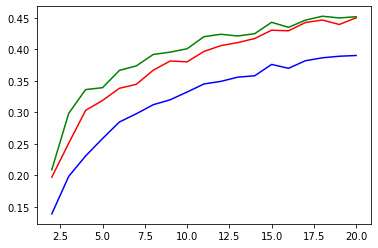

In [27]:
def affichage(i):
    Lx, LyR, LyV, LyB = [], [], [], []
    global imgPath
    image = cv2.imread(imgPath) 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    R,V,B = differencierCouleurs(image)
    for k in range (2,i+1):
        (imgSeg, cb) = kMeansAlgo(k)
        vect = matriceToList(imgSeg)
        Lx.append(k)
        LyR.append(NMI_KMeans(R,vect,k))
        LyB.append(NMI_KMeans(B,vect,k))
        LyV.append(NMI_KMeans(V,vect,k))
    plt.plot(Lx, LyR, c = 'red')
    plt.plot(Lx, LyV, c = 'green')
    plt.plot(Lx, LyB, c = 'blue')
    plt.show()

affichage(20)


In [15]:
import scipy.io

def recupererADN():
    mat = scipy.io.loadmat('DNA_species.mat')
    dico = {}
    listeLabel = list((mat['label'])[:,0])
    listeSpecies = []
    for k in range (len(listeLabel)):
        listeSpecies.append(listeLabel[k][0])
    listeADN = list(mat['str'])
    for p in range (len(listeADN)):
        liste=[]
        liste[:0]=listeADN[p]
        dico[listeSpecies[p]] = liste
    return dico

In [16]:
alphabetVect = {"A": 0, "T": 1, "C": 2, "G": 3, "-": 4}

def comparaison():
    dictionnaire = recupererADN()
    listeComparaisons = []
    for animal, adn in dictionnaire.items():
        reference = "Comparaison of " + str(animal) + " : "
        listeAnimal = [reference]
        for animal2, adn2 in dictionnaire.items():
            if animal != animal2:
                nmi = NMI(adn, adn2)
                listeAnimal.append("with " + animal2 + " - NMI = " + str(nmi)[0:6])
        listeComparaisons.append(listeAnimal)
    return listeComparaisons

comparaison()


[['Comparaison of Cow : ',
  'with Carp - NMI = 0.3261',
  'with Chicken - NMI = 0.3521',
  'with Human - NMI = 0.3251',
  'with Loach - NMI = 0.3333',
  'with Mouse - NMI = 0.5218',
  'with Rat - NMI = 0.5464',
  'with Seal - NMI = 0.5669',
  'with Whale - NMI = 0.5949',
  'with Frog - NMI = 0.3695'],
 ['Comparaison of Carp : ',
  'with Cow - NMI = 0.3261',
  'with Chicken - NMI = 0.3155',
  'with Human - NMI = 0.2699',
  'with Loach - NMI = 0.5039',
  'with Mouse - NMI = 0.3283',
  'with Rat - NMI = 0.3271',
  'with Seal - NMI = 0.3291',
  'with Whale - NMI = 0.3542',
  'with Frog - NMI = 0.4243'],
 ['Comparaison of Chicken : ',
  'with Cow - NMI = 0.3521',
  'with Carp - NMI = 0.3155',
  'with Human - NMI = 0.3040',
  'with Loach - NMI = 0.2978',
  'with Mouse - NMI = 0.3477',
  'with Rat - NMI = 0.3551',
  'with Seal - NMI = 0.3389',
  'with Whale - NMI = 0.3519',
  'with Frog - NMI = 0.3574'],
 ['Comparaison of Human : ',
  'with Cow - NMI = 0.3251',
  'with Carp - NMI = 0.2699',


In [25]:
import operator

def plusProcheVoisin(espece):
    dico = recupererADN()
    comparaisonDic = {}
    ADN_Cible = dico[espece]
    for animal, adn in dico.items():
        if animal != espece:
            nmi = NMI(adn, ADN_Cible)
            comparaisonDic[animal]= nmi
    max_key = max(comparaisonDic, key=lambda key: comparaisonDic[key])
    res = max_key + " shares the highest NMI with the " + espece
    return(res)

plusProcheVoisin("Human")


'Whale shares the highest NMI with the Human'